# Using Waggle to Work with Camera

For more information on using Waggle see the <a href='https://github.com/waggle-sensor/pywaggle'>pywaggle GitHub</a>.

### Setup

In [10]:
from waggle.data.vision import Camera, BGR
import cv2
import PIL.Image
from io import BytesIO
import IPython.display

The first line imports the waggle code that will allow us to access the camera stream.
The rest of the import statements are only used to display the images captured from the camera inside this notebook.

### Helper Function

This function takes the data in the form of an array coming from the camera and turns it into a jpeg image that can be displayed.

In [11]:
#Use 'jpeg' instead of 'png' (~5 times faster)
def array_to_image(a, fmt='jpeg'):
    #Create binary stream object
    f = BytesIO()
    
    #Convert array to binary stream object
    PIL.Image.fromarray(a).save(f, fmt)
    
    return IPython.display.Image(data=f.getvalue())

### Streaming

Change the value of `username` to reflect the username of your camera.
Change the value of `password` to reflect the password of your camera.
Change the value of `camIP` to reflect the IP address of your camera.
In order to stop the stream, hit the stop button at the top of the page to interupt the kernel.

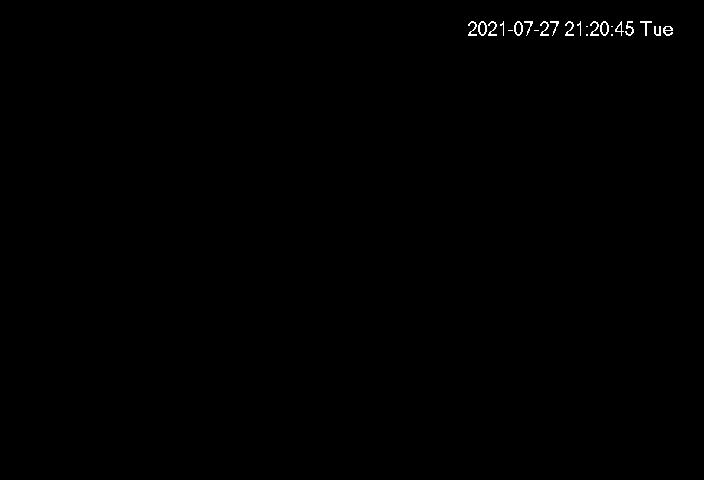

KeyboardInterrupt: 

In [13]:
username = 'admin'
password = 'adminadmin!'
camIP = "10.42.0.69"

streamURL = 'rtsp://' + username + ':' + password + '@' + camIP + ':554/cam/realmonitor?channel=1&subtype=1'
cam = Camera(streamURL, format=BGR)

d = IPython.display.display("", display_id=1)

for sample in cam.stream():
    frame = cv2.cvtColor(sample.data, cv2.COLOR_BGR2RGB)
    im = array_to_image(frame)
        
    d.update(im)